In [172]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [173]:
data_name = "transformed_ecoPlus"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,1,34,883,0,neutral or dissatisfied
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,41,354,0,neutral or dissatisfied
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,39,1734,0,satisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,1452,9,neutral or dissatisfied
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,41,296,0,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

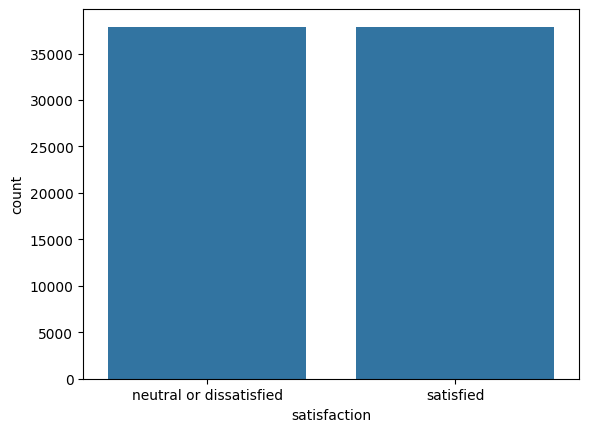

In [174]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [175]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,34,883,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,41,354,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,39,1734,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,1452,9
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,41,296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75761,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,40,579,0
75762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,25,733,16
75763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,44,1300,0
75764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,35,946,10


In [176]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1        neutral or dissatisfied
2                      satisfied
3        neutral or dissatisfied
4                      satisfied
                  ...           
75761    neutral or dissatisfied
75762    neutral or dissatisfied
75763    neutral or dissatisfied
75764    neutral or dissatisfied
75765    neutral or dissatisfied
Name: satisfaction, Length: 75766, dtype: object

In [177]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53036, 80) and test set is :(22730, 80)


In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17437165, -0.40779017, -0.48880191, ...,  1.39153219,
         1.59761105, -0.52953062],
       [-0.17437165, -0.40779017, -0.48880191, ...,  0.4761833 ,
         0.40797209, -0.52953062],
       [-0.17437165,  2.45224152, -0.48880191, ..., -0.4391656 ,
        -0.44569582, -0.52953062],
       ...,
       [-0.17437165,  2.45224152, -0.48880191, ...,  1.23897404,
         0.76167249,  0.60951001],
       [-0.17437165,  2.45224152, -0.48880191, ..., -0.36288652,
        -1.20007939, -0.52953062],
       [-0.17437165, -0.40779017, -0.48880191, ..., -1.12567727,
        -1.21248993, -0.24477046]])

## Set paramiter CV

In [179]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()

start_time = time.time()  # เวลาเริ่มต้น
model_lr.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_LR = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.386730 วินาที


In [181]:
#Predict the accuracy of the model
y_pred_lr=model_lr.predict(X_test)
accuracy_LR=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 95.7 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.96      0.96     11417
              satisfied       0.96      0.96      0.96     11313

               accuracy                           0.96     22730
              macro avg       0.96      0.96      0.96     22730
           weighted avg       0.96      0.96      0.96     22730



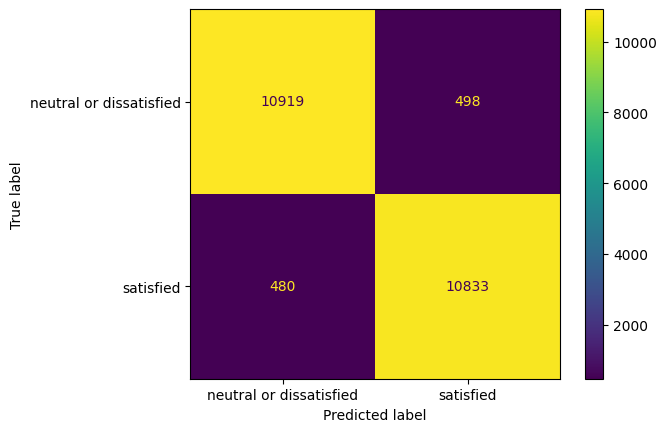

In [182]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

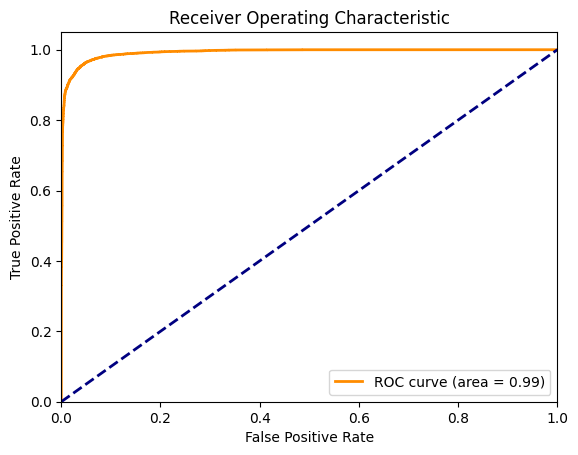

In [183]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# แปลง y_test เป็นค่าตัวเลข
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ทำนายโอกาสของแต่ละ class
y_prob = model_lr.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [184]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_LR = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_LR:.6f} วินาที")


Cross Validation Scores (Logistic Regression): [0.95248869 0.95164027 0.95757919 0.95022624 0.9530543  0.95475113
 0.95588235 0.96069005 0.95616516 0.95164027 0.95390271 0.95558699
 0.95558699 0.95417256 0.95219236]
Mean CV Accuracy: 0.9544
Standard Deviation CV Accuracy: 0.0026
เวลาที่ใช้ในการทำ Cross Validation: 5.680074 วินาที


In [185]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, model_lr.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9547100082962516
Test Accuracy: 0.9569731632204136


## Save Model Predic

In [186]:
import pickle
pickle_out = open("../../pipelines/model_LR_ecoPlus.pkl", mode = "wb")
pickle.dump(model_lr, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_LR_ecoPlus.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [187]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
68179,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,45,2584,22,neutral or dissatisfied
43134,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,72,2162,22,neutral or dissatisfied
466,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,51,2131,0,satisfied
57077,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,41,3173,3,neutral or dissatisfied
62391,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,35,489,0,neutral or dissatisfied
13295,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,42,293,0,neutral or dissatisfied
42915,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,35,2409,0,satisfied
7494,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,1,1,65,1142,0,neutral or dissatisfied
51268,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,51,372,0,satisfied
33822,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,1,49,125,0,satisfied


In [188]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
68179,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,45,2584,22
43134,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,72,2162,22
466,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,51,2131,0
57077,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,41,3173,3
62391,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,35,489,0
13295,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,42,293,0
42915,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,35,2409,0
7494,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,65,1142,0
51268,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,51,372,0
33822,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,49,125,0


In [189]:
y_sam = df_sam.iloc[:,-1]
y_sam


68179    neutral or dissatisfied
43134    neutral or dissatisfied
466                    satisfied
57077    neutral or dissatisfied
62391    neutral or dissatisfied
13295    neutral or dissatisfied
42915                  satisfied
7494     neutral or dissatisfied
51268                  satisfied
33822                  satisfied
48336                  satisfied
32302    neutral or dissatisfied
72367    neutral or dissatisfied
21860    neutral or dissatisfied
13746                  satisfied
8885                   satisfied
50159    neutral or dissatisfied
11861                  satisfied
50280    neutral or dissatisfied
33726                  satisfied
Name: satisfaction, dtype: object

In [190]:
model = pickle.load(open("../../pipelines/model_LR_ecoPlus.pkl", 'rb'))
scaler_LR = pickle.load(open("../../pipelines/scaler_LR_ecoPlus.pkl", 'rb'))

scaler_new = scaler_LR.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of LR is : {round(accuracy_KNN*100,2)} % .")

['neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'satisfied' 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'satisfied' 'satisfied']
Accuracy of LR is : 85.0 % .
